### INE 410146 - Applied Machine Learning
$\textbf{Author: Prof. Mateus Grellert}$



Bibliographic references used in this lesson:
- Han, Kamber, Data Mining: Concepts and Techniques, Chapter 2
- Aggarwal, Charu C, Data Mining: The Textbook, Chapter 1
- Skiene, Steven, The Data Science Design Manual, Chapter 1

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings

warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
warnings.filterwarnings("ignore", message="MatplotlibDeprecationWarning")


# 2 - Getting to Know your Data

In a world where data is abundant, unclean, and commonly unstructured, it is important to devote some time to understand it before jumping into a machine learning pipeline. As we will learn throughout the course, no one model works best for every data set there is, so we need knowledge about our data to help us design an efficient solution to our problem.

Performing an **exploratory data analysis** will allow us to confirm previous knowledge we had about the information we're dealing with, occasionally learn new things that will guide future decisions in our project, and foresee some problems that could affect our performance.

In this lesson, we will learn some tools and techniques that can be used to assess, summarize, and visualize our data, but first we must understand some important concepts that are common in the machine learning study. This lesson is composed of the following topics:
- Data Types
- Descriptive Statistics
- Visualization Techniques

First, we will discuss a little bit about the data types that we will work with, then explain how we can analyze and visualize them depending on these types.

We will heavily count on **Pandas** and its several used methods and data structures to help us in this course, so we recommend you to study the basics of this library if you can. Their website has a [quick guide](https://pandas.pydata.org/pandas-docs/version/1.3/user_guide/10min.html) to help you with the basics, and they also provide documentation for all the methods we're going to use. We also recommend you to learn about the ``DataFrame`` and ``Series`` data structures, as well as their common methods.

The **Seaborn** library will also be used due to its several methods for data visualization. A [tutorial](https://seaborn.pydata.org/tutorial.html) can also be found on their webpage.


## 2.1 - Exploratory Data Analysis 

Now that we understand how our attributes can be classified, we can start our exploratory analysis. Our goal here is to generate a **profile of our data set**, showing how attributes are distributed, potential cases of outliers or invalid values, data availability etc.

In this lesson, we will use a [data set](https://www.kaggle.com/uciml/pima-indians-diabetes-database) containing clinical records of native american women from a people called the Pima. This data was collected to understand which biomarkers can assist in diagnosing diabetes.

The attributes of this data set are:
1. Pregnancies: Number of times pregnant
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure: Diastolic blood pressure (mm Hg)
4. SkinThickness: Triceps skin fold thickness (mm)
5. Insulin: 2-Hour serum insulin (mu U/ml)
6. BMI: Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: Diabetes pedigree function
8. Age: Age (years)
9. Outcome: diabetes test result (1 for positive, 0 for negative)

Let's first remind ourselves that, in the machine learning community, the attributes used as input for prediction are also called **features**, and the variable that we want to predict is called **class**, **label** (for classication) or **target variable** (can be used for classification and regression). 

Note that most of our attributes are numerical, except for our class variable (Outcome). 

Let's open it up with Pandas to make use of its powerful ``DataFrame`` structure. The ``info()`` method is a quick way of viewing the content of our data set.

## 2.2- Data Types

**Disclaimer:** like many other things in machine learning, there is no consensus on the best way to categorize the different types of data. Psychologist Stanley Smith Stevens proposed a typology in 1946 that is commonly adopted today, using four types (nominal, ordinal, interval and ratio). However, other categories are important for predictive modeling, like temporal or spatial dependency. Therefore, we will build upon a compiled version of recent literature references. The figure below shows an attempt to organize some of the concepts that will be discussed in the following paragraphs.

![types of data](FIGS/2-types_of_data.png)

In his "Data Science Design Manual", Skiena first categorizes data as being ``structured`` or ``unstructured``.

**Unstructured** data comprises the raw, unprocessed information that is collected from all types of heterogeneous sources, like web pages, text documents, vital signals etc. Unstructured data is usually unorganized and does not follow a format. A preprocessing phase is commonly employed to make this data usable in machine learning algorithms.

**Structured** data, on the other hand, is well organized and usually well formatted. This data can be easily (in some cases directly( mapped to a set of features that can be used in the machine learning pipeline. However, this does not mean that no preprocessing is required. Structured data may also contain hazards like missing values, outliers, noisy information etc.

Aggarwal, in his Data Mining book, adds the concepts of ``nondependency-oriented`` and ``dependency-oriented`` data.

**Nondependency-oriented** represents data whose entries do not have an implicit or explicit relationship among them. For instance, if we interview several people in a randomized fashion, the answers of one interview will not affect the answers of another.

In **dependency-oriented** data, however, there is an implicit or explicit relationship among neighboring entries. For instance, if a sensor is measuring the temperature of a room periodically, the value that is measured each instant is related to the previous values.

For nondepency-oriented data, the attributes can be further categorized based on the values that they can assume, classified as ``numerical`` or ``categorical``. Knowing the correct type of each attribute is very important, because this will define the techniques and algorithms that can be used.

**Categorical**, qualitative or discrete attributes, as the name suggests, represents variables whose values are limited to a specific, reduced set of categories. Some special types of categorical variables are binary (assume only two values), nominal (assume a set of values with no sense of order), and ordinal (order is important). Examples of categorical variables include: age group (nominal), season of the year, day of the week, size of a lump (ordinal), and all types of flag variables that represent the presence of an event (binary).

**Numerical**, quantitative or continuous attributes are the variables that can assume several (even infinite) amount of values of an interval, represented as numbers. Numeric features can be interval-scaled, when there is no true zero and therefore comparisons are based on differences, or ratio-scaled, when there is a true zero, so comparisons in terms of ratio can be made. To exemplify the difference, let us consider the temperature measured in the Celsius scale. We cannot say that $10^oC$ is twice as warm as $5^oC$, because this scale does not have a true zero, i.e., $0^oC$ does not mean absence of temperature. If we consider the Kelvin scale, however, we will have a true zero at $0^oK$, so it is safe to say that $10^oK$ is twice as warm as $5^oK$ Other examples of numeric attributes include: calendar years (interval-scale), blood pressure (ratio-scaled), and number of retweets.

Dependency-oriented data also has subcategories based on what type of dependecy occurs. For instance, the **spatial**  category represents data in which spatially-neighboring entries are correlated. Examples include: the number of COVID-19 cases registered each day (time-series, possibly spatial as well), pixels in an image (spatial), and words in a sentence (time-series).



In [2]:
import pandas as pd

# reading a CSV dataset with comma-separated values (,)
df = pd.read_csv('../DATASETS/pima_diabetes.csv', sep = ',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The output of the ``info()`` method first shows the number of rows (entries) and columns (attributes) in our dataset. Therefore, 768 entries and 9 columns were read successfully. The following lines show the name of each attribute, the number of entries that are not null, and the data type (based on [numpy data types](https://numpy.org/doc/stable/user/basics.types.html)). The last line shows the amount of RAM required by our dataset (important for predicting memory and computing requirements).

The fact that null entries were not detected does not necessarily mean all entries are valid. Null values can be represented in different ways depending on the dataset. If we know it beforehand, the ``read_csv()`` function allows us to configure which values should be considered null with the ``na_values`` parameter.

Pandas usually does a good job inferring the types of our attributes, but note that our class attribute (Outcome) was detected as being an ``int64`` type. Since we know that our class is binary, we can fix this by converting it to categorical with the ``astype()`` method. Since we're at it, let's replace the $0$ and $1$ values for ones that actually tell us what they represent.

In [3]:
# the `inplace` argument is used for altering the values in the dataframe itself, 
# instead of returning a new dataframe with the modifications
df["Outcome"].replace(0, 'Negative', inplace = True)
df["Outcome"].replace(1, 'Positive', inplace = True)
df["Outcome"] = df["Outcome"].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


Now that we have our columns assigned to their most suited type, we can start analyzing its columns using descriptive statistics. This will give us an overall description of our data and is very useful for detecting problems like invalid, noisy or missing values.

There are two basic aspects we can measure in our data: the central tendency, which tells us where most of our data is concentrated, and the dispersion, which shows us how spread out is our data.

### 2.2.1 - Central Tendency

The measures of central tendency try to tell us where most of our data is concentrated. This is useful, because we can describe with a single value an entire distribution. There is more than one way of measuring the central tendency, and we will discuss the most basic ones:

**Mean ($\mu$):** it is the sum of all values in a column divided by the number of summed values. It is mathematically expressed as $\mu(X)=\frac{1}{n}\sum_i^nX_i$. It can also be called average.

**Median:** if we order a series based on its values, the median is the value that separates this ordered list right in the middle. When there is an even number of values, the median of an ordered series $X$ is located in position $\frac{|X|+1}{2}$. If the number is even, we take the average of positions  $\frac{|X|}{2}-1$ and $\frac{|X|}{2}+1$.

**Mode:** this is the most frequent value in a series. So if we count how many times each value occurs, the one with the highest count would be the mode. We can have series with more than one, two (bimodal) or more (multimodal) modes.

For **numeric** values, the mean and median are recommended predictors of central tendency. If our data is **asymmetrical**, i.e., the left and right halfs of the distribution are uneven, then it is recommended to use the median instead of the mean. The median is also less sensitive to outliers. For **categorical** data, the mode is the most recommended descriptor of central tendency.

It is also possible to evaluate the symmetry (or skewness) of a series by simply comparing the central tendency measurements. For instance, the data is considered **symmetric** when all three are near each other. When the mode is smaller than the median, then we say that the data is **positively skewed**. Otherwise, it is **negatively skewed**. The figure below shows this example.

![Examples of symmetric and skewed distributions](FIGS/2-skewness.png)
<center>(source: Data Mining Concepts and Techniques)</center>


### 2.2.2 - Dispersion

Measuring the dispersion or the spread of our data is also important to understand how much the central tendencies are representative. The mean of series that is too disperse does not hold much description value. Let's see some ways of measuring this dispersion.

**Standard Deviation ($\sigma$):** it is the rooted squared difference between each sample and the mean, i.e., $\sigma(X)=\sqrt{\frac{1}{n}\sum_i^n(X_i-\mu)^2}$. The square of the standard deviation is called **variance** and is also commonly used in descriptive statistics.

**Quantiles:** consider that we plot the distribution of a series and divide it into equally-spaced intervals (in terms of percentage). The data points where each new interval begins are called quantiles. These values are used to summarize how our distribution behaves. The quantiles are represented as percentages, so if we split our data into four points, we would have 0.25, 0.5 and 0.75 quantiles (also called **quartiles** in this case). The figure below illustrates this.

![quantile example](FIGS/2-quantile_example.png)
<center>(source: Data Mining Concepts and Techniques)</center>

The 50% percentile (or second quartile - Q2) is also the **median**, and represents the point where our data is divided into two equally-distributed parts. Also, if the set composed of (min, Q1, Q2, Q3, max) is called the **5-number summary**.

**Interquartile range (IQR):** a final metric for defining the spread is the interquartile range. This value represents the distance between the first and third quartiles, i.e., $IQR=Q_3-Q_1$. The IQR can be used to measure dispersion, and some authors defend that a good rule of thumb for **removing outliers** is to drop values  falling at  least  $1.5\times IQR$ above the  third  quartile or below the first quartile.

## 2.3 - Putting it to practice

Let's see how we can obtain all these values in Python. Thankfully, the ``describe()`` method will already give us the main descriptors we need. 

In [4]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean    31.992578                  0.471876   33.240885  
std      7.884160                  0.331329   11.760232  
min      0.000000                  0.078000   21.000000  
25%     27.300000                  0.243750   24.000000  
50%     32.000000                  0.372500   29.000000  
75%     36.600000                  0.626250   41.000000  
max     67.100000                  2.420000   81.000000

The output of this method shows, for each column, the count of valid entries, the mean and standard deviation (std), as well as the 5-number summary.

We can see that most of our columns are asymmetrical, since the mean and the meadian (50% quartile) are different. We can alo see only adult women were included in the analysis (minimum age is 21). 

It is also worth mentioning that the maximum amount of pregnancies is 17, which is far what is expected. This case can be considered an **outlier**, i.e., a value that is too distant from the mean and that usually represents an anomalous event. This is probably what's causing the difference between the mean and the median in this column.

By looking at the min and max values, we can observe that the min value for blood pressure is $0$. This is likely an **invalid measurement**, since it would represent that the patient is dead. The same goes for glucose with a value of $0$.

A final observation is that the ``Outcome`` attribute was not included in this analysis. This is because the ``describe()`` only shows numeric attributes by default. We can change this with the ``include`` parameter.

In [5]:
df.describe(include = 'category')

Outcome
count        768
unique         2
top     Negative
freq         500

Note that the descriptors used here are different, showing values that are more suitable for categorical data. The output shows us we have $2$ unique values, which makes sense for a binary variable. It also shows us that the most frequent element (top) is ``Negative``, which is also expected. 

Finally, we can see that the most frequent case occured in $500$ of $768$ entries. This is an important information because it shows that our dataset is **imbalanced**, i.e., the occurrences of each class value are different. We will get back to this matter in future lessons, but you should know now that imbalanced data is usually unwanted and must be handled somehow.

### 2.3.1 - Visualizing Central Tendency and Dispersion

A great tool for visualizing the five-number summary is the **box plot**. Let's first take a look at it before explaining what it shows. We will use the **plot** method of the Pandas library for this.

<AxesSubplot:>

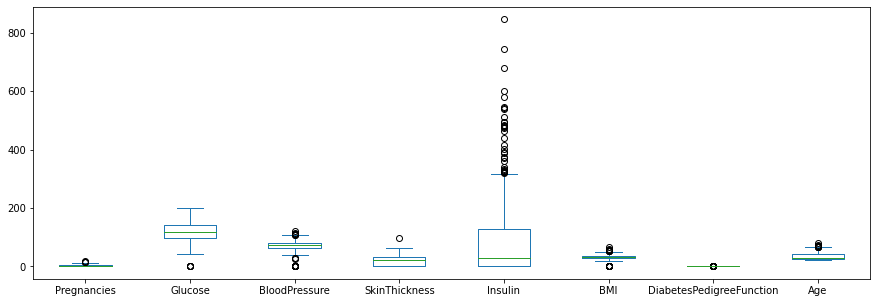

In [6]:
# the kind parameter is used to select the boxplot, and the figsize is used to define the size of the plot
df.plot(kind = "box", figsize= (15,5))

<AxesSubplot:>

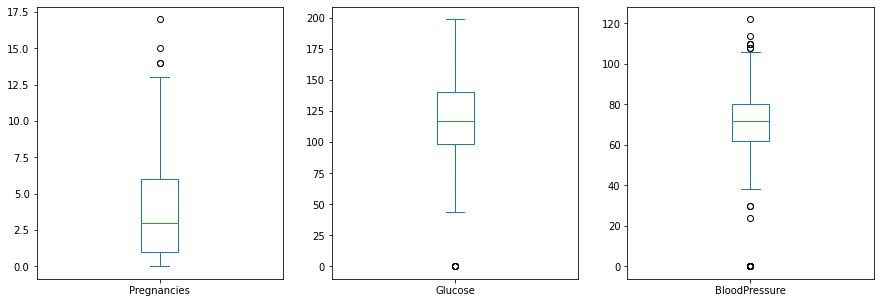

In [7]:
# creating three subplots in the same figure (one row, three columns)
# the axes variable will hold a list with the three subplots for referencing 
fig, axes = plt.subplots(1,3, figsize = (15,5))

# plotting a specific series in each element of the axes list
df["Pregnancies"].plot(kind = "box", ax = axes[0])
df["Glucose"].plot(kind = "box", ax = axes[1])
df["BloodPressure"].plot(kind = "box", ax = axes[2])


Showing the boxplot for all columns on the same chart (first figure) makes it difficult to read due to differences in scale. In such cases, it is better to create a single plot for each column individually. Now let's see how we can read this chart.

The box represents the area between quartiles Q1 and Q3. The green line in the middle of the box is the meduan (Q2). The whiskers can mean two things: if there is no outlier, the whisker indicates the minimum or the maximum value. If the series has outliers, the whisker is extended as far as $1.5\times IQR$, and samples out of this limit are plotted as rounded points. 

To exemplify, let's take the glucose chart in the middle. This chart has a median of ${\sim}100$, an IQR of ${\sim}50$, a maximum of $200$ and a minimum of $0$. Since this minimum is smaller than $Q1 - 1.5\times IQR$, it is plotted as an outlier.

If we want to stratify our boxplot by a category, for instance our class variable, we can use the boxplot implementation of the ``seaborn`` library. This library contains several useful visualization techniques, so we will be using it a lot in our course.


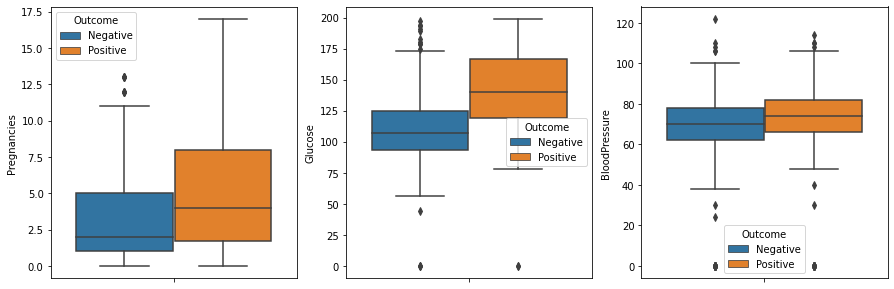

In [8]:
import seaborn as sns

fig, axes = plt.subplots(1,3, figsize = (15,5))

# The `hue` parameter tells pandas to stratify the plots based on the values of that variable
# We can use any column for x, y, and hue, but we must always tell which Data Frame is referenced 
# using the `data` parameter
sns.boxplot(x=[""]*len(df), y = 'Pregnancies', hue = 'Outcome', data = df, ax = axes[0])
sns.boxplot(x=[""]*len(df), y = 'Glucose', hue = 'Outcome', data = df, ax = axes[1])
sns.boxplot(x=[""]*len(df), y = 'BloodPressure', hue = 'Outcome', data = df, ax = axes[2])

plt.show()

As we can see, the distributions of the **Pregnancies** and **Glucose** variables are quite different depending on the **Outcome** for diabetes. This means that these variables are **associated** with each other, and that they will probably be useful if we need to estimate the odds of a patient testing positive for diabetes. Keep in mind, though, that this does not necessarily mean that they cause diabetes.

A second useful visual aid is the **quantile-quantile plot (QQ plot)**. The goal here is to compare an observed series with a teorical one in terms of quantiles. If both distributions are the same, the QQ plot will follow a straight line.

QQ plots are useful to check if a given attribute follow a known distribution (line Gaussian or Poisson). It can also be used to see if the attributes in the train and test sets follow the same distribution.

We can plot QQ plots using the ``problot()`` method of the ``scipy.stats`` library. The ``dist`` parameter defines what distribution we are trying to compare our data with. This distribution is plotted as a straight line in the charts.

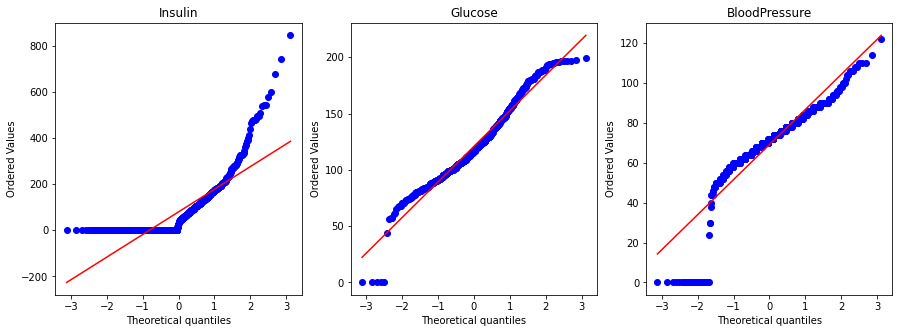

In [9]:
import scipy.stats as stats

fig, axes = plt.subplots(1,3, figsize = (15,5))

# comparing attributes with a Gaussian (normal) distribution
stats.probplot(df["Insulin"], dist = 'norm', plot = axes[0])
stats.probplot(df["Glucose"], dist = 'norm', plot = axes[1])
stats.probplot(df["BloodPressure"], dist = 'norm', plot = axes[2])

axes[0].set_title("Insulin")
axes[1].set_title("Glucose")
axes[2].set_title("BloodPressure")

plt.show()


As we can see the plots above, the glucose and blood pressure attributes follow a distribution that is somewhat close the normal. The are some discrepancies in the right and left ends, but most of the range falls on the line with the expected values.

### 2.3.2 - Measuring and Visualizing Associations in Data

Besides box and QQ plots, there are several other visualization techniques that allow us to detect associations in our data. Let's view some other examples, explaining the idea behind them, how to use them in Python, and how to interpret the results.


#### Histograms and Scatter plots

Histograms are graphical representations of a distribution. In the $x$ axis, the ordered values are shown, and the $y$ axis shows the number of occurences (or frequency) of each value. To make visualization simpler, histograms typically group ranges of values in bins (also called buckets), adding up all the occurrences of the values inside each bin. Like what we did in the boxplots, we can also plot stratified histograms, comparing the distribution of a variable for different categories of another variable.

While histograms are usually shown for a single variable, scatter plots are visualization tools used to evaluate the relationship between two (or three) variables. Given two series $X$ and $Y$ with the same length, the scatter plot is formed with $(x_i,y_i)$ pairs of these variables.

Let's illustrate these concepts with some Python code. There is more than one option for plotting histograms, and scatter plots, but we will stick to the ``pandas`` and ``seaborn`` libraries for convenience.

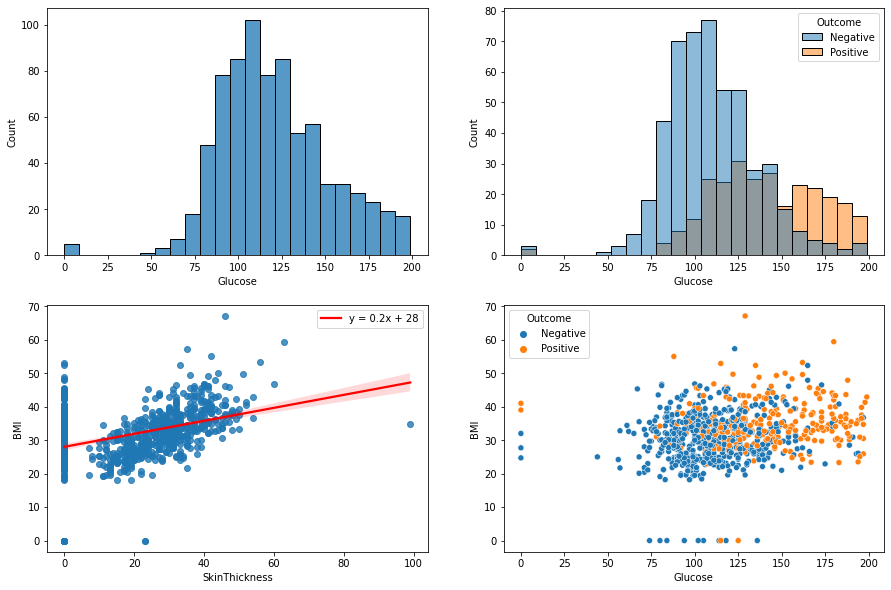

In [36]:
from scipy import stats 

fig, axes = plt.subplots(2,2, figsize = (15,10))

# fitting regression to obtain slope and coefficient terms (just for the regression plot)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['SkinThickness'],df['BMI'])
reg_str = 'y = {0:.1f}x + {1:.0f}'.format(slope, intercept)

sns.histplot(data=df, x="Glucose", ax = axes[0][0])
sns.histplot(data=df, x="Glucose", hue = "Outcome", ax = axes[0][1])
sns.regplot(data=df, x="SkinThickness", y ="BMI", ax = axes[1][0], line_kws={"color": "red", 'label' : reg_str})
sns.scatterplot(data=df, x="Glucose", y ="BMI", hue = "Outcome", ax = axes[1][1])

axes[1][0].legend()

plt.show()




Note that the histogram of the ``Glucose`` variable on the left is almost bell-shaped, but it's right half has a more disperse behavior. However, when we stratify this histogram to separate positive from negative cases of diabetes, we observe that the negative distribution is normally distributed, and the positive cases where the ones disrupting the normality of this distribution. 

We can also see here that the central tendencies of positive and negative histograms are clearly different, with positive patientes presenting higher levels of glucose. In predictive modeling, we say that we can **separate** the positive and negative cases with some degree of confidence using the ``Glucose`` information.  For instance, the chances of a test being positive for glucose levels close to 175 are much higher than a lower level of 75.

In some cases, one or more features are capable of separating the class distributions completely. In these cases, we say that our data is **linearly separable**. However, this almost never the case for real data sets, so we should always expect some misclassifications even with very efficient models.

By observing the scatter plot on the right side, we can conclude that skin thickness is associated with the body mass index. More than that, we can say that the former is **positively correlated** with the latter. In other words, when the skin thickness grows, the BMI also grows proportionally in a linear fashion.

#### Association, Correlation, and Causation

We've mentioned the words association and correlation when analyzing the relationships between two variabels. These terms might be new to some of you, so it is important to talk about them a little bit.

Both association and correlation are terms used to express a notion of **dependency** among variables. When two variables are dependent, there is a predictability relationship between them, i.e., we gain information from one varibale by knowing about another. For instance, if we know that a person has a greater value of skin thickness, I can predict that this same person will have a greater BMI.

**Association** is the term used when two variables are related to each other in some way. It simply means that they are dependent, but nothing else. Therefore, it is a more flexible, general term.

**Correlation** is used when the association follows a trend, i.e., when variable $X$ changes, varibale $Y$ also changes with a consistent behavior. When both variables grow in the same direction, the correlation is said to be positive (as in the BMI-skin thickness examples). A negative correlation means that, if one variable grows, the other is reduced and vice-versa.

Correlation can be measured in more than one way, but the most usual ones use the Person's correlation ($\rho$ or $r$) coefficient and the Spearman's rank coefficient ($\rho$ or $r_s$). Both can assume values between $-1$ and $1$, with $0$ representing uncorrelated variables. The difference between them is that Pearson is suitable when there is a **linear** correlation. Spearman can be used even the corelation is not linear, but it must be **monotonic**. The figure below shows the difference between series with association and correlation.

<div>
<img src="FIGS/2-pearson_spearman.png" width="500"/>
 <center> Source: Association, correlation and causation - <a href = https://www.nature.com/articles/nmeth.3587> Nature, 2015 </a> </center> 
</div>

Regardless of whether our data is associated, correlated, both, or neither, we must always remember a very important lesson.

<p style="margin:10px;"> <span style="background-color:#eeeeee;padding:5px;margin:10px;border-style:solid">  Correlation and association <strong> DO NOT </strong> imply causation!  </span> </p> 

This is a very recurrent statistical falacy that we always need to avoid when working with such analyses.

#### Scatter Plot Matrix (Pairplot)

Another tool that is available off the self is the ``pairplot()`` from the ``seaborn`` library. This plot shows the 2D scatter plots of all the numeric variables in out data set. It can be used to easily detect relationships between our variables, as well as their ditribution.

The ``seaborn`` implementation allows us to stratify the data based on a category, making this plot even more informative. 


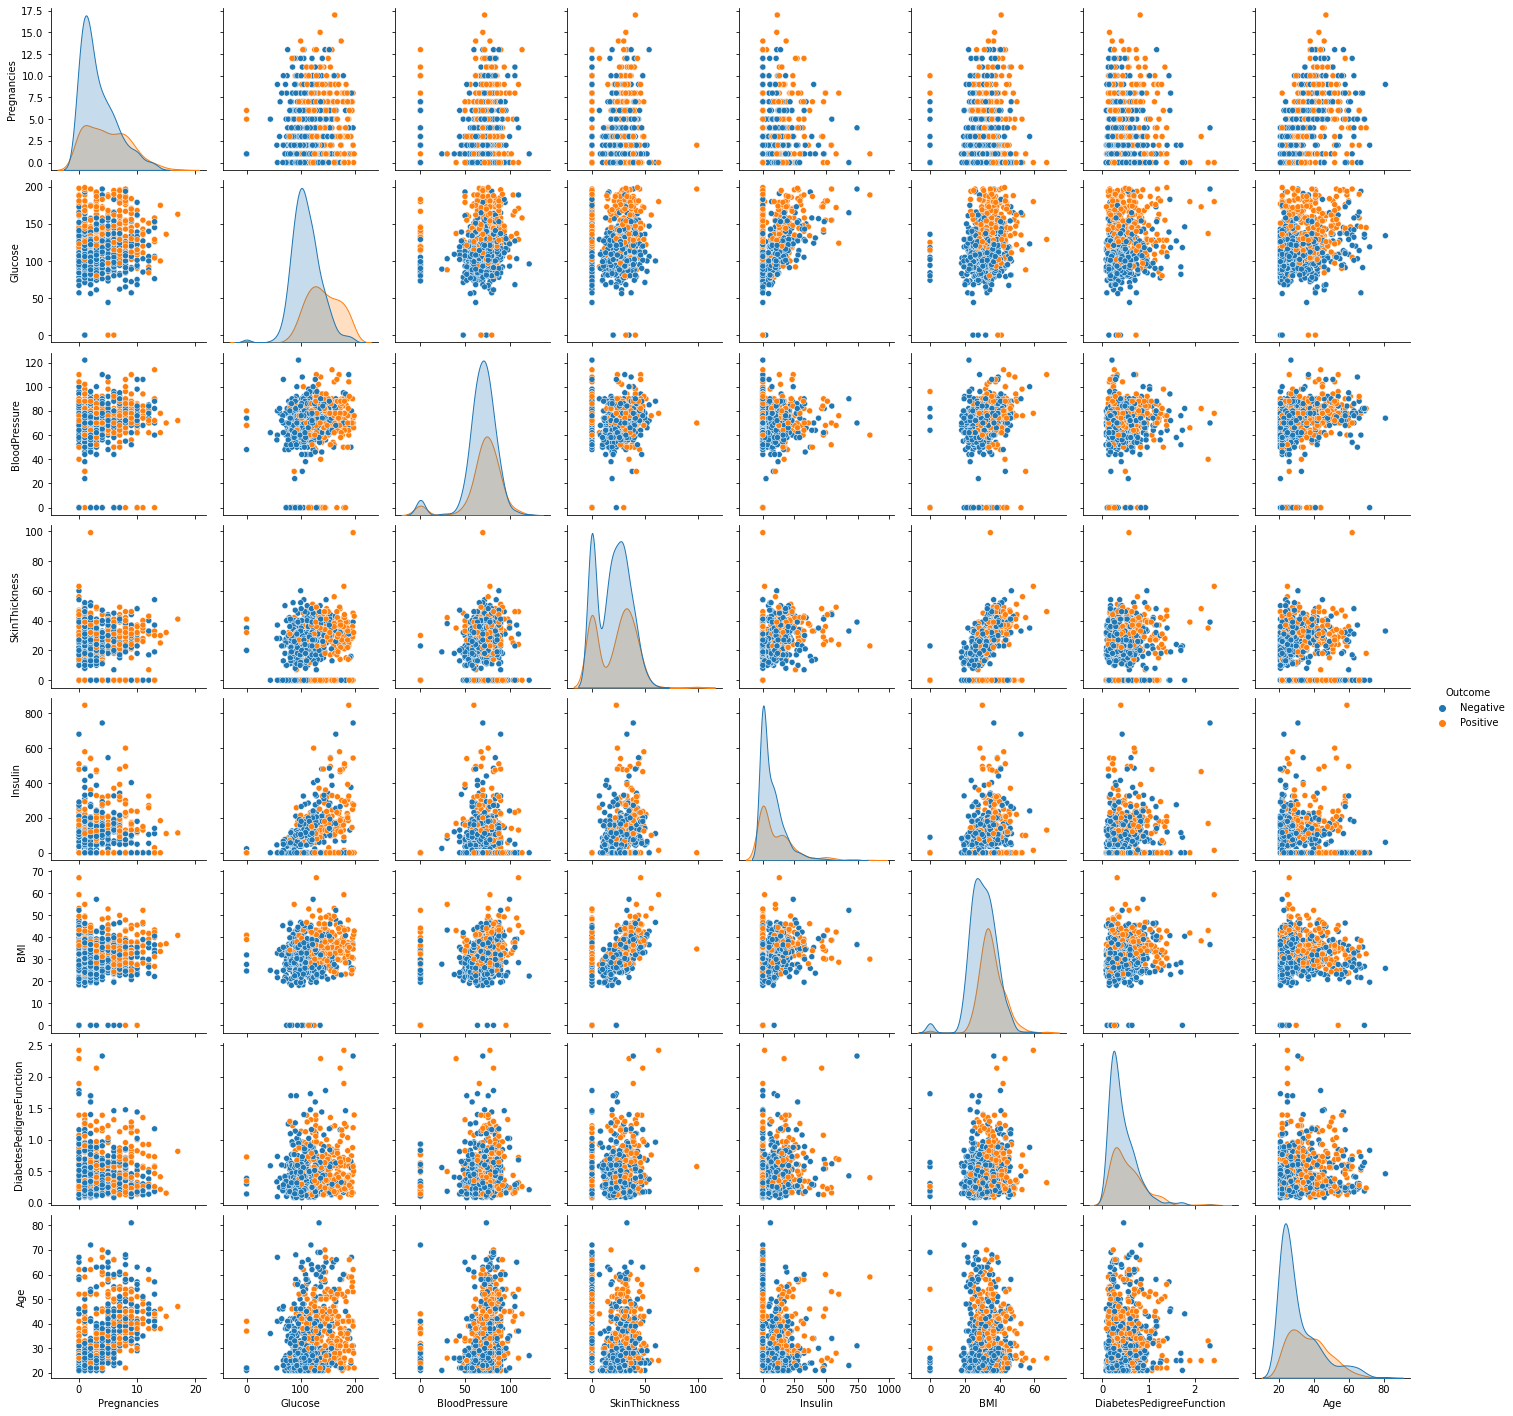

In [11]:
sns.pairplot(data = df, hue = "Outcome")

By observing the pairplot, we can identify a relationship between the variables ``Age`` and ``Pregancies``, which also makes sense, as older woman are more likely to have been pregnant more times than younger ones. We can also see that there are several patients that did not have their skin thickness and blood pressure measured, which explains the large concentration of samples with at $0$.

#### Correlation Matrix

It is also interesting to analyze the correlation between our pairs of values, features with high correlation are usually redundant, meaning that they convey similar information to our predictive models. Therefore, we can choose to eliminate one of them or combine them into a single feature that contains the information from both.

For **regression problems**, we can also compute the correaltion with the target variable. This will give us a hint of which features will likely be useful for the models that will be trained later. However, even features with low correlation still can prove useful in some cases (remember the correlation-association discussion).

Plotting a correlation matrix with ``seaborn`` and ``pandas`` is quite easy:
- first we compute the correlation with the ``corr()`` method of the pandas library. This will give us a 2D matrix containing the correlation between each pair of variables.
- then we plot this matrix using the ``heatmap()`` function of the ``seaborn`` package, which will allow us to visualize the correlations with a color map.

By default, the ``corr()`` computes the Pearson's coefficient, but other methods can be selected with the ``method`` parameter. 

<AxesSubplot:>

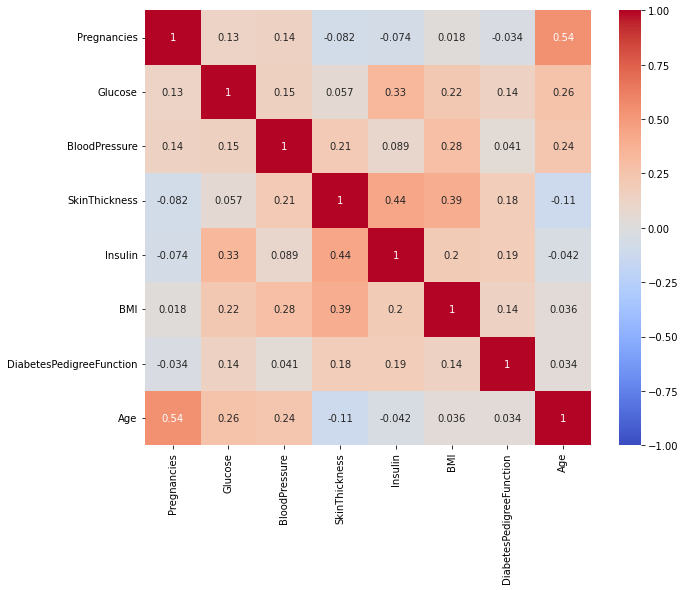

In [12]:
import seaborn as sns

fig = plt.figure( figsize = (10,8))

df_correlation = df.corr(method = 'pearson')

# setting vmin, vmax to -1,1 will force the heatmap to map colors in this range
# annot = True will show the actual values in the heatmap
sns.heatmap(df_correlation, cmap = 'coolwarm', 
            vmax = 1, vmin = -1, annot=True,
            xticklabels = df_correlation.columns.values,
            yticklabels = df_correlation.columns.values)


The correlation table has symmetrical upper and lower triangulars, since $\rho(A,B) = \rho(B,A)$, and the main diagonal has the maximum correlation of $1$. We can see that most of our attributes are positively correlated. We can also confirm what was observed in the pairplot, showing that ``Age`` and ``Pregnancies`` are indeed correlated ($\rho=0.54$). 

Note that our matrix only computes the correlation between pairs of numerical attributes. That is because measuring the association between categorical or between categorical and numeric values involves different approaches. The following table shows some alternatives for measuring association depending on the variables you are handling. For more details, we recommend the following reading: [The search for categorical correlation](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9) by Shaked Zychlinski.

|             | Categorical | Numeric  |
| ---         | ---         | ---      |
| **Categorical** | Cramer's V,<br /> Theil's U | Correlation <br /> Ratio                        |
| **Numeric**     |Correlation<br /> Ratio      | Pearson's, Spearman's,<br /> Kendall Coefficient   |


#### Contingency tables, pivot tables and count plots

When we have categorical variables, organizing them in tables can be useful for understanding their distribution and detecting possible relationships. This approach is actually used in several methods for detecting associations in categorical variables.

A **contingency table** over two categorical variables $A$ and $B$ organizes the categories of variable $A$ in its rows, and the values of $B$ in its columns. The value of each cell represents the total number of items that have the corresponding values of $A$ and $B$.

Let's visualize this using ``pandas`` and its ``crosstab`` method. Since our Pima data set only has a single categorical value, we will use a different data set for this section. This data set is used to predict the presense of **heart disease**, which is represented as a binary variable ($0$ means having the disease, $1$ otherwise). The data set can be obtained in [this link](https://www.kaggle.com/ronitf/heart-disease-uci), and it contains clinical variables as features, some of which are categorical. More details about this data set can be views in [this link](https://towardsdatascience.com/heart-disease-uci-diagnosis-prediction-b1943ee835a7).

In [13]:
df2 = pd.read_csv('../DATASETS/heart.csv', sep = ',')
df2.info()
df2["target"].replace(0, "has disease", inplace = True)
df2["target"].replace(1, "no disease",  inplace = True)

df2["sex"].replace(0, "Female", inplace = True)
df2["sex"].replace(1, "Male",  inplace = True)

df2["target"] = df2["target"].astype("category")
df2["sex"] = df2["sex"].astype("category")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
# sex: 0 - female, 1 - male
# the normalize = 'index' parameter will divide the counts by the total number of items in each row
pd.crosstab(df2["sex"], df2["target"], normalize = 'index')


target  has disease  no disease
sex                            
Female     0.250000    0.750000
Male       0.550725    0.449275

We can observe that the most of the patients in this dataset are men ($114+93=207$ against $24+72=96$ women). In addition, the **prevalence** of heart disease is much stronger in men as well (55% of men present heart disease, against 25% for women). In some cases, it is better to visualize these counts using a bar chart. This can be done with the ``countplot`` method of the ``seaborn`` library.

<AxesSubplot:xlabel='sex', ylabel='count'>

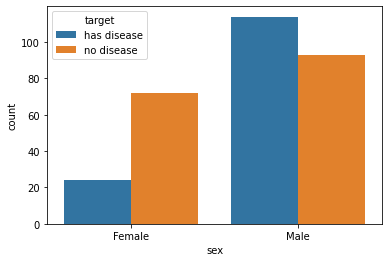

In [15]:
sns.countplot(data= df2, x='sex',hue='target')

**Pivot tables** work in a similar fashion, but they represent a broader concept of aggregation tables. In other words, we can aggregate our data using different types of functions (mean, max, count etc). It is also possible to configure how missing values are treated in pivot tables, which happens in most practical scenarios. The only drawback

The ``pandas`` implementation of pivot tables involve four parameters:
- index: variables whose categories will be grouped in the rows
- columns: variables whose categories will be grouped in the columns
- aggfunc: aggregation functon, which by default is the ``np.mean`` (of the ``numpy`` library)
- data: reference to the DataFrame 

In [16]:
import numpy as np 

# cp stands for 'chest pain': 0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic
# chol stands for 'serum cholestoral in mg/dl
pd.pivot_table(index = ["sex", "target"], values = ["age", "chol"], data = df2, fill_value = 0)

age        chol
sex    target                            
Female has disease  59.041667  274.958333
       no disease   54.555556  256.750000
Male   has disease  56.087719  246.061404
       no disease   50.903226  230.989247

An interesting observation from this table is that heart disease seems to be associated with age and cholesterol as well, which is something that we learn at school. 

#### Visualizing text and mixed data

Many interesting problems involve handling data with complex and unstructured information for the same problem. In such cases, different visualization approaches are necessary.

For **text data**, a common visualization approach involves plotting a **word cloud**. This technique shows the terms that happen more frequently in a corpus (a large body of text data). Of course that this involves a series of preprocessing steps to remove stop words, typos etc. The figure below shows a word cloud created from a body of wine reviews.

<div>
<img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1530033900/Full_Bodied_wrljfv.png" width="500"/>
 <center> Source: Generating WordClouds in Python - <a href = https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1530033900/Full_Bodied_wrljfv.png
> Data camp </a> </center> 
</div>

Another tool that is very useful for interpreting mixed data are **tree maps**. A tree map allows us to view hierarchical structures represented by rectangles. Categories can be used to define the hierararchies, whereas the area of rectangles can be configured based on a numeric attributes. 

The ``plotly`` library has a very express method for plotting tree maps. A very interesting feature of plotly is that it allows interactive charts. The ``treemap()`` method expects the following parameters:

- the first positional argument is the DataFrame to be processed
- path: variables used to build the hiearchies
- values: numeric column used to define the size of rectangles
- color: adds a color scale based on a numeric attribute

The example below shows a tree map built using a "Video Game Sales" data set (available [here](https://www.kaggle.com/gregorut/videogamesales)).
 

In [17]:
import plotly.express as px

df3 = pd.read_csv('../DATASETS/vgsales.csv')
df3.dropna(inplace=True)

fig = px.treemap(df3, 
                 path=['Platform', 'Genre'], 
                 values='Global_Sales',
                 color='NA_Sales'
                )
fig.show()

## 2.4 - Summary

- Our data sets are composed of variables that can be **categorized** in different ways based on the **values** that they can assume
- Many methods rely on knowing if the variables are **categorical** (assume a limited set of values) or **numerical** (assume a very large set of values)
- The purpose of an **exploraratory analysis** is to draw important conclusions and to posit relationships between variables, as well as detect problems in our data
- **Binary** variables are a special type of categorical values that are widely employed in classification studies
- We can use **descriptive statistics**  appropriate methods also depend of the type of data being evaluated.
- **Correlation and association** are important to analyze the dependency between variables, but they **do not** imply causation
- **Visualizing** data can be tricky, because it depends on which type of information we want to convey. The good news is that most methods are already implemented in libraries like ``pandas``, ``seaborn``, and ``plotly``

In the next lesson, we will discuss how we can clean and treat our data to make it easier to understand and also to make it more useful for the prediction models that will rely on them.

## Exercises

Implement the solution in Python for the following exercises:
- Han, Kamber, Data Mining: Concepts and Techniques, Chapter 2:
 - Exercises 2.2, 2.4
 
- Aggarwal, Charu C, Data Mining: The Textbook, Section 1.9:
 - Exercises 2, 3, 4
 
- Skiene, Steven, The Data Science Design Manual, Section 1.9:
 - Exercises 1.3, 1.4, 1.12


<h1> <center> See you all in our next lesson! &#128516; </center> </h1>